<a href="https://colab.research.google.com/github/WennieLin/solar_flare_model/blob/main/solar_flare_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Random Forest with Log Transformation
MSE: 0.100, RMSE: 0.316, MAE: 0.113


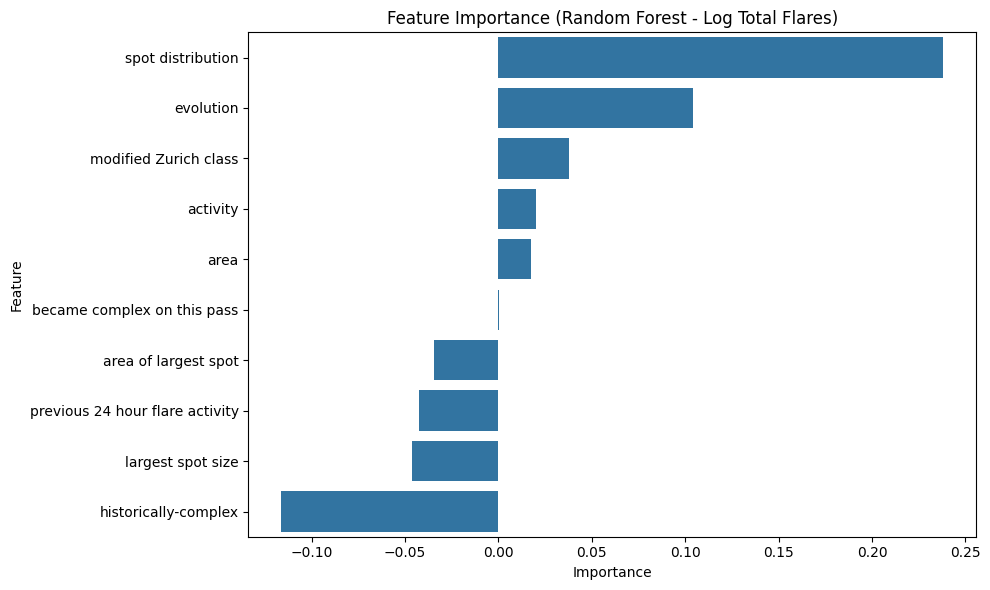

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.inspection import permutation_importance

# Load the dataset
df = pd.read_csv("data/SolarFlareDataset.csv")

# Encode categorical variables
categorical_cols = ['modified Zurich class', 'largest spot size', 'spot distribution']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Create new target variable: total flares
df['total_flares'] = df['moderate flares'] + df['severe flares']

# Apply log transformation to handle skewness
df['log_total_flares'] = np.log1p(df['total_flares'])  # log(1 + x)

# Define features and log-transformed target
X = df.drop(columns=['common flares', 'moderate flares', 'severe flares', 'total_flares', 'log_total_flares'])
y = df['log_total_flares']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set (log scale)
y_pred_log = rf_model.predict(X_test)

# Reverse the log transformation to get predictions on original scale
y_pred = np.expm1(y_pred_log)
y_test_exp = np.expm1(y_test)

# Evaluate
mse = mean_squared_error(y_test_exp, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_exp, y_pred)

print(f"Random Forest with Log Transformation\nMSE: {mse:.3f}, RMSE: {rmse:.3f}, MAE: {mae:.3f}")

# Feature Importance using permutation
result = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance (Random Forest - Log Total Flares)')
plt.tight_layout()
plt.show()
